## Importing Modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Data and plot data points:

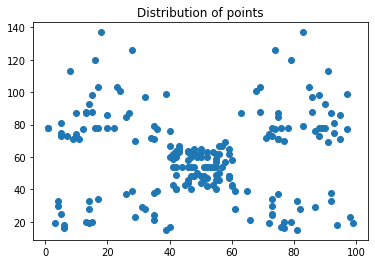

In [2]:
data_points = pd.read_csv(r'F:\HWs\Challenge\rc_task_2.csv')

points = np.array(data_points)

plt.scatter(points[:, 0], points[:, 1])
plt.title('Distribution of points')
plt.show()

## ِDefining Functions

In [3]:
def clusters_means(points, clusters, number_of_clusters):
    
    cluster_mean = np.zeros((number_of_clusters, 2))
    
    for cluster in range(number_of_clusters):
        
        elements = np.where(clusters == cluster)
        
        cluster_mean[cluster, 0] = np.mean(points[elements, 0])
        cluster_mean[cluster, 1] = np.mean(points[elements, 1])
        
    return cluster_mean

def loss_p1(clusters_mean):
    
    number_of_clusters = clusters_mean.shape[0]
    loss_value = 0
    
    for i in range(number_of_clusters):
        
        for j in range(i, number_of_clusters):
            
            loss_value = loss_value + (clusters_mean[i, 0] - clusters_mean[j, 0]) ** 2 + (clusters_mean[i, 1] - clusters_mean[j, 1]) ** 2
            
    
    return loss_value

def clusters_vars(points, clusters, number_of_clusters):
    
    cluster_var = np.zeros((number_of_clusters, 2))
    
    for cluster in range(number_of_clusters):
        
        elements = np.where(clusters == cluster)
        
        cluster_var[cluster, 0] = np.var(points[elements, 0])
        cluster_var[cluster, 1] = np.var(points[elements, 1])
        
    return cluster_var

def loss_p2(clusters_var):
    
    loss_value = np.sum(clusters_var)            
    
    return loss_value

def scatter_clusters(points, clusters):
    
    colors = ['b', 'm', 'r', 'y', 'k']
    
    for cluster in range(5):
        
        elements = np.where(clusters == cluster)
        
        plt.scatter(points[elements, 0], points[elements, 1], c = colors[cluster])
    
    plt.title('Clustered points (in 5 clusters)')
    plt.show()
    
def loss_p3(clusters):
    
    distribution = np.unique(clusters, return_counts=True)[1]
    
    return np.sum(distribution ** 2)
    
    
def loss_(points, clusters, number_of_clusters, alpha, beta, gamma):
    
    loss_val = -1 * alpha * loss_p1(clusters_means(points, clusters, number_of_clusters)) + beta * loss_p2(clusters_vars(points, clusters, number_of_clusters)) + gamma * loss_p3(clusters)
    
    return loss_val

## Initializing Parameters and running optimization:

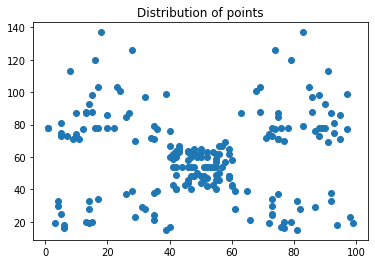

147.1103600548588
104.50624001661781
82.47536451661374
78.44159106522612
69.13948397812429
67.88932894869677
67.53135497838858
67.50850425021646
67.49617221714553
67.49617221714553


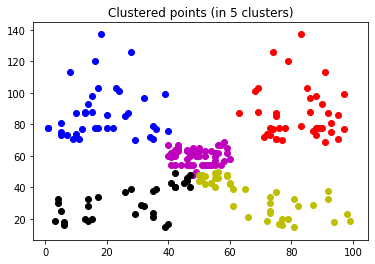

[38 51 39 40 32] ['b', 'm', 'r', 'y', 'k']


In [4]:
number_of_points = points.shape[0]
number_of_clusters = 5

alpha = 0.001 # for mean
beta = 0.01 # for variance
gamma = 0.01 # for balancing of clusters

clusters = np.random.randint(5, size = number_of_points)

clusters_mean = clusters_means(points, clusters, number_of_clusters)
clusters_var = clusters_vars(points, clusters, number_of_clusters)

# scatter_clusters(points, clusters)

plt.scatter(points[:, 0], points[:, 1])
plt.title('Distribution of points')
plt.show()

# print(loss_p1(clusters_mean))
# print(loss_p2(clusters_var))
# print(clusters_var)
# print(clusters_mean)


loss = loss_(points, clusters, number_of_clusters, alpha, beta, gamma)
print(loss)

for iterations in range(100):
    
    ex_loss = loss
    
    for point in range(number_of_points):
    
        loss_cluster = np.zeros(number_of_clusters)
        cluster_numbers = range(number_of_clusters)

        for cluster in cluster_numbers:

            clusters[point] = cluster
            loss_cluster[cluster] = loss_(points, clusters, number_of_clusters, alpha, beta, gamma)

        best_choice = np.where(loss_cluster == np.nanmin(loss_cluster))

        clusters[point] = cluster_numbers[best_choice[0][0]]

    loss = loss_(points, clusters, number_of_clusters, alpha, beta, gamma)
    print(loss)

    #     scatter_clusters(points, clusters)
    #     plt.close()
    
    if np.abs(loss - ex_loss) < 0.0000000000001:
        
        break

scatter_clusters(points, clusters)

# loss = loss_(points, clusters, number_of_clusters, alpha, beta, gamma)
# print(loss)

d = np.unique(clusters, return_counts=True)[1]
colors = ['b', 'm', 'r', 'y', 'k']
print(d, colors)

## Write Clustering outputs in a new CSV file

In [19]:
clusters_mat = clusters.reshape(200, 1)
output_file = np.concatenate((points, clusters_mat), axis = 1)

np.shape(output_file)

np.savetxt(r'F:\HWs\Challenge\clustered_points.csv', output_file, delimiter=',')

### Good tune: alpha = 0.001, beta = 0.01, gamma = 0.005
### This tune is better for completely seperating clusters, but number of points for each group follows an unbalanced distribution

### Now, we want more balanced distribution: 0.005, 0.01, 0.05